# Audi
If you are using Jupyter Notebook
- conda install tensorflow
- conda install graphviz
- conda install pydot

## Install Some Package

In [5]:
!pip install --upgrade plotly

  Using cached plotly-5.10.0-py2.py3-none-any.whl (15.2 MB)
  Attempting uninstall: plotly
    Found existing installation: plotly 5.6.0
    Uninstalling plotly-5.6.0:
      Successfully uninstalled plotly-5.6.0


In [3]:
!pip install cufflinks

  Using cached cufflinks-0.17.3-py3-none-any.whl
  Using cached colorlover-0.3.0-py3-none-any.whl (8.9 kB)


## Importing Libraries and Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

In [4]:
import cufflinks as cf
from plotly.offline import init_notebook_mode,iplot

init_notebook_mode(connected = True)
cf.go_offline()

In [5]:
audi = pd.read_csv('audi.csv')

In [6]:
audi.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [7]:
len(audi)

10668

## Observing the Data

In [8]:
audi.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [9]:
audi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


In [10]:
audi.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year,10668.0,2017.100675,2.167494,1997.0,2016.00,2017.0,2019.0,2020.0
price,10668.0,22896.685039,11714.841888,1490.0,15130.75,20200.0,27990.0,145000.0
mileage,10668.0,24827.244001,23505.257205,1.0,5968.75,19000.0,36464.5,323000.0
tax,10668.0,126.011436,67.170294,0.0,125.00,145.0,145.0,580.0
mpg,10668.0,50.770022,12.949782,18.9,40.90,49.6,58.9,188.3
engineSize,10668.0,1.930709,0.602957,0.0,1.50,2.0,2.0,6.3


In [11]:
audi.corr()['price'].sort_values(ascending=False)

price         1.000000
year          0.592581
engineSize    0.591262
tax           0.356157
mileage      -0.535357
mpg          -0.600334
Name: price, dtype: float64

## Visualization

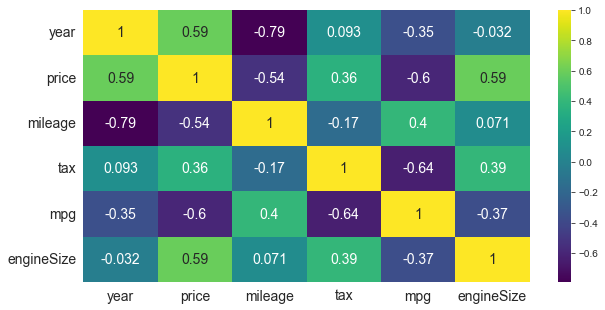

In [12]:
plt.figure(figsize = (10,5))
sns.heatmap(audi.corr(),annot = True,annot_kws={'size':14},cmap = 'viridis')
plt.xticks(size = 14)
plt.yticks(rotation = 'horizontal',size = 14)
plt.show()

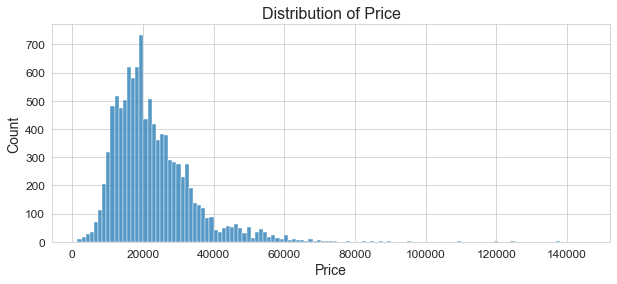

In [13]:
plt.figure(figsize = (10,4))
sns.histplot(x = 'price',data = audi)
plt.xlabel('Price',size = 14)
plt.xticks(size = 12)
plt.ylabel('Count',size = 14)
plt.yticks(size = 12)
plt.title('Distribution of Price',size = 16)
plt.show()

In [14]:
audi = audi[audi.price<70000] 

In [15]:
years = audi.groupby('year').mean()
years.head(2)

,price,mileage,tax,mpg,engineSize
year,,,,,
1997,4650.0,122000.0,265.0,18.9,4.2
1998,4999.0,55000.0,265.0,30.4,1.8


In [16]:
def plot_by_year(feature):
    years[feature].plot()
    plt.xlabel('Year',size = 14)
    plt.xticks(size = 12)
    plt.ylabel(feature.title(),size = 14)
    plt.yticks(size = 12)
    plt.title('Average '+feature.title()+' by Year',size = 16)

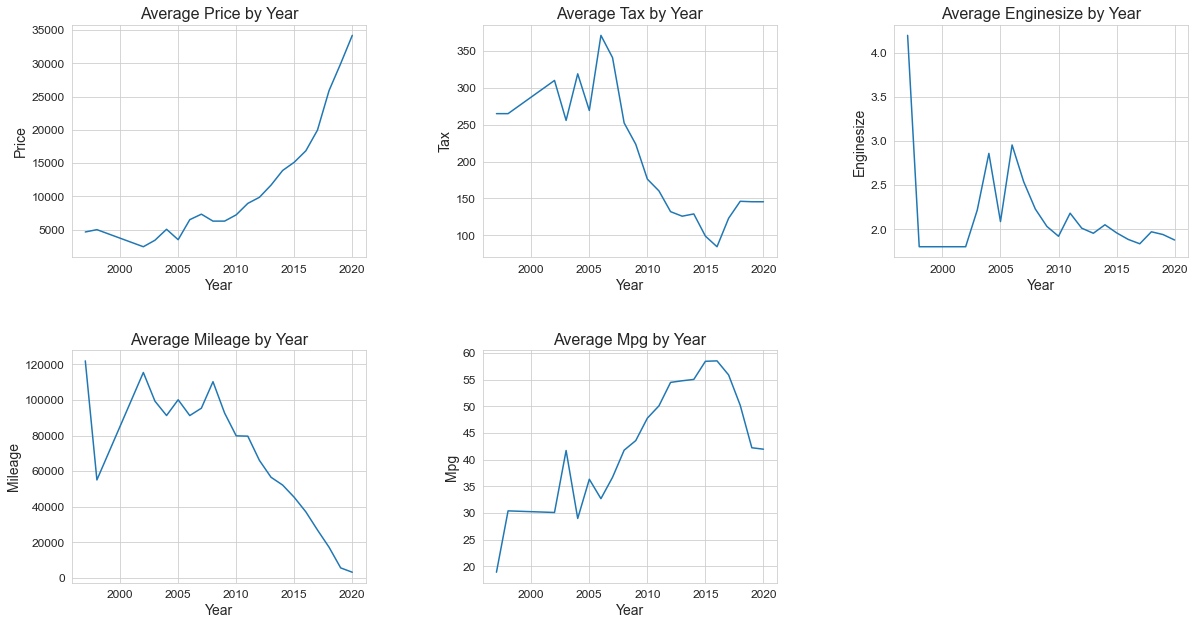

In [17]:
plt.figure(figsize = (20,10))

plt.subplot(2,3,1)
plot_by_year('price')

plt.subplot(2,3,2)
plot_by_year('tax')

plt.subplot(2,3,3)
plot_by_year('engineSize')

plt.subplot(2,3,4)
plot_by_year('mileage')

plt.subplot(2,3,5)
plot_by_year('mpg')

plt.subplots_adjust(right=0.9, top=0.9, wspace=0.4, hspace=0.4)
plt.show()

In [18]:
def plot_price(feature):
    sns.scatterplot(x = feature,y = 'price',data = audi)
    plt.xlabel(feature.title(),size = 16)
    plt.xticks(size = 14)
    plt.ylabel('Price',size = 16)
    plt.yticks(size = 14)

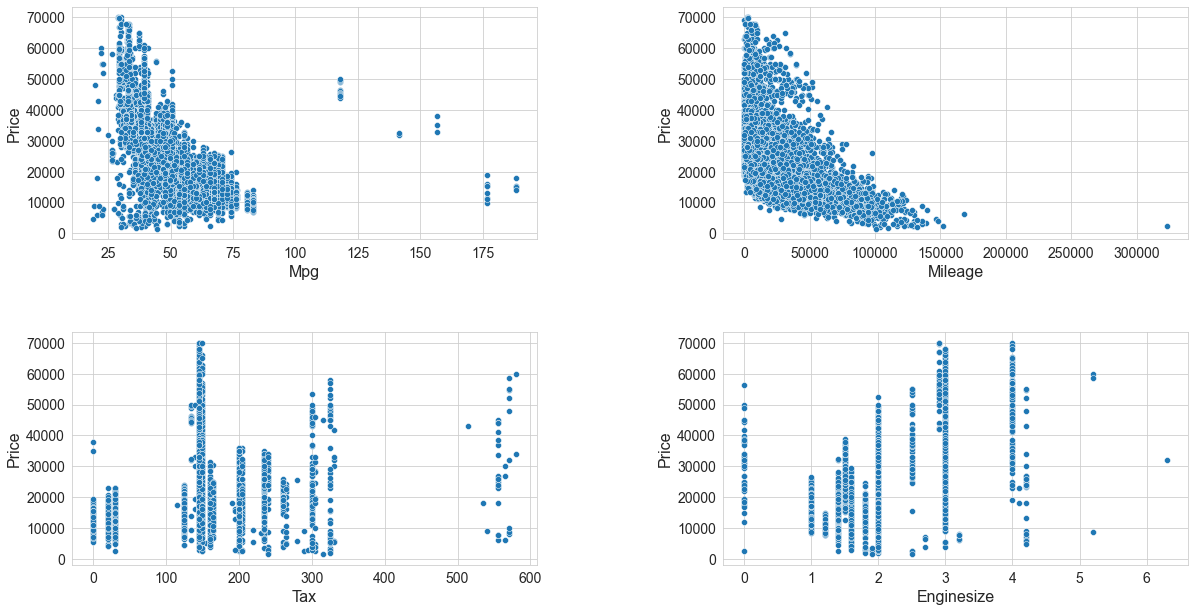

In [19]:
plt.figure(figsize = (20,10))

plt.subplot(2,2,1)
plot_price('mpg')

plt.subplot(2,2,2)
plot_price('mileage')

plt.subplot(2,2,3)
plot_price('tax')

plt.subplot(2,2,4)
plot_price('engineSize')

plt.subplots_adjust(right=0.9, top=0.9, wspace=0.4, hspace=0.4)
plt.show()

In [20]:
audi = audi[(audi.mileage<200000) & (audi.engineSize<5) & (audi.mpg<100)]

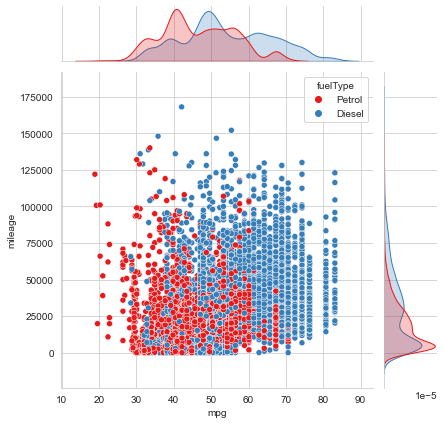

In [21]:
sns.jointplot(x = 'mpg',y = 'mileage',data = audi,hue  = 'fuelType',palette = 'Set1')
plt.show()

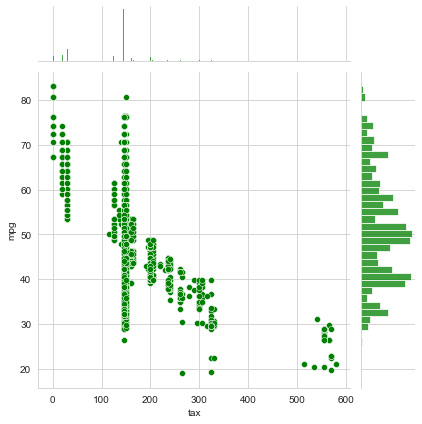

In [22]:
sns.jointplot(x = 'tax',y = 'mpg',data = audi,color= 'g')

In [23]:
models = audi.groupby('model').mean()

In [24]:
models['price'].iplot(mode = 'lines+markers',colors = ['blue'],title = "Average Price of Audi Cars by Models"
                      ,xTitle = 'Models',yTitle = 'Average Price') 

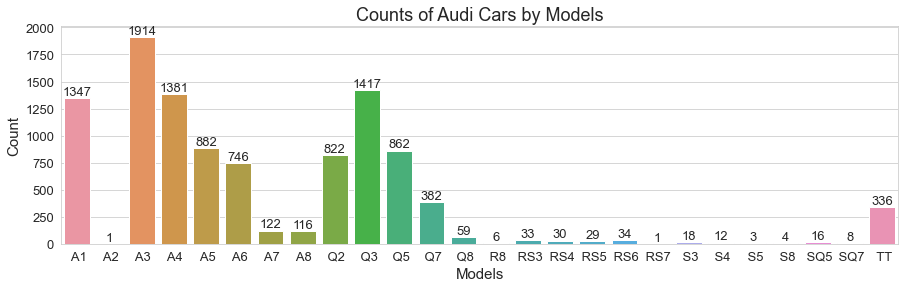

In [25]:
model_order = audi['model'].sort_values().unique()

plt.figure(figsize = (15,4))

ax = sns.countplot(x = 'model',data = audi,order = model_order)
ax.bar_label(ax.containers[0],size = 13)
plt.xlabel('Models',size = 15)

plt.xticks(size = 13)
plt.ylabel('Count',size = 15)
plt.yticks(size = 13)

plt.title('Counts of Audi Cars by Models',size = 18)
plt.show()

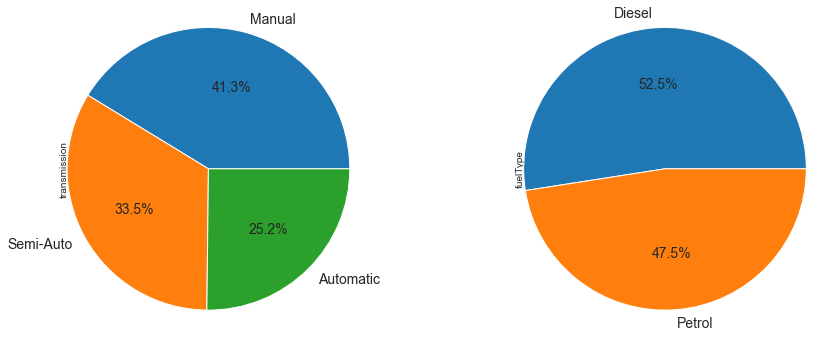

In [26]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
audi['transmission'].value_counts().plot.pie(autopct = '%.1f%%',textprops = {'size':14},radius = 1.3)

plt.subplot(1,2,2)
audi['fuelType'].value_counts().plot.pie(autopct = '%.1f%%',textprops = {'size':14},radius = 1.3)

plt.show()

## Data Preprocessing

In [27]:
X = audi.drop(['price','model','transmission'],axis = 1).values
y = audi['price'].values

In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,2] = le.fit_transform(X[:,2])

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [30]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Creating ANN Models

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

In [32]:
ann = Sequential()

ann.add(Dense(units=12,activation='relu'))

ann.add(Dense(units=6,activation='relu'))

ann.add(Dense(units=1, activation=None))

ann.compile(optimizer='adam',loss = 'mse')

In [33]:
early_stopping = EarlyStopping(patience = 25,monitor = 'val_loss')

In [34]:
ann.fit(X_train,y_train,batch_size=32,epochs=200,validation_data=(X_test,y_test),callbacks=[early_stopping])

Epoch 1/200
248/248 [==============================] - 1s 1ms/step - loss: 622541248.0000 - val_loss: 600116608.0000
Epoch 2/200
248/248 [==============================] - 0s 907us/step - loss: 622288512.0000 - val_loss: 599642880.0000
Epoch 3/200
248/248 [==============================] - 0s 982us/step - loss: 621279296.0000 - val_loss: 597972416.0000
Epoch 4/200
248/248 [==============================] - 0s 924us/step - loss: 618520704.0000 - val_loss: 594220480.0000
Epoch 5/200
248/248 [==============================] - 0s 961us/step - loss: 613413632.0000 - val_loss: 588106560.0000
Epoch 6/200
248/248 [==============================] - 0s 1ms/step - loss: 605793536.0000 - val_loss: 579532544.0000
Epoch 7/200
248/248 [==============================] - 0s 1ms/step - loss: 595558208.0000 - val_loss: 568426880.0000
Epoch 8/200
248/248 [==============================] - 0s 881us/step - loss: 582607168.0000 - val_loss: 554661056.0000
Epoch 9/200
248/248 [==============================] -

248/248 [==============================] - 0s 987us/step - loss: 12473215.0000 - val_loss: 11849442.0000
Epoch 140/200
248/248 [==============================] - 0s 925us/step - loss: 12455964.0000 - val_loss: 11832103.0000
Epoch 141/200
248/248 [==============================] - 0s 982us/step - loss: 12437946.0000 - val_loss: 11818441.0000
Epoch 142/200
248/248 [==============================] - 0s 829us/step - loss: 12422395.0000 - val_loss: 11800785.0000
Epoch 143/200
248/248 [==============================] - 0s 871us/step - loss: 12404529.0000 - val_loss: 11782443.0000
Epoch 144/200
248/248 [==============================] - 0s 828us/step - loss: 12388936.0000 - val_loss: 11771023.0000
Epoch 145/200
248/248 [==============================] - 0s 995us/step - loss: 12374541.0000 - val_loss: 11756927.0000
Epoch 146/200
248/248 [==============================] - 0s 946us/step - loss: 12362076.0000 - val_loss: 11742751.0000
Epoch 147/200
248/248 [==============================] - 0s 85

<AxesSubplot:>

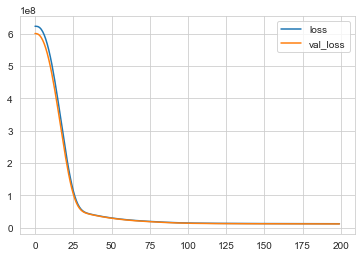

In [35]:
losses = pd.DataFrame(ann.history.history)
losses.plot()

In [36]:
y_pred = ann.predict(X_test)

83/83 [==============================] - 0s 545us/step


## Plotting Model

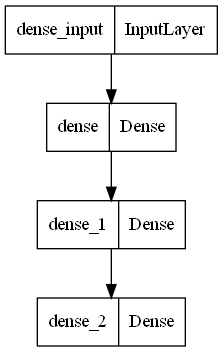

In [38]:
plot_model(ann, to_file = 'model.png')

## Result

In [39]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [40]:
r2 = round(r2_score(y_test,y_pred),2)
mae = round(mean_absolute_error(y_test,y_pred),2)
mse = round(mean_squared_error(y_test,y_pred),2)

print(f'r2 score:  {r2}\nmae score: {mae}\nmse score: {mse}')

r2 score:  0.9
mae score: 2369.49
mse score: 11227417.56


## Predict a Single Value

In [41]:
# df.describe().transpose()

In [42]:
# predictions = [[your_predictions_of_each_columns]]
# predictions = sc.transform(predictions)

# model_predict = (model.predict(predictions)[0][0] > 0.5).astype('int32')

# print('\nResult: ',model_predict)

## Save / Load ANN Model

### Save

In [43]:
# try:
#     model.save('my_model.h5')
#     print('Model Saved!')
# except Exception as ex:
#     print(ex)

### Load

In [44]:
# from keras.models import load_model
# try:
#     my_model = load_model('my_model.h5')
#     print('Model Loaded!')
# except Exception as ex:
#     print(ex)